# Centrality measures

Centrality measures helps us understand who are the most important people in the network. The example below uses the `email-Eu-core network` from Standford's SNAP.

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/jinhangjiang/Datasets/main/Network%20Data/emailEUcore/email-Eu-core.txt",
    delimiter=" ",
    names=["Source", "Target"],
)
# Filter only the first 100 people for brevity.
df = df.loc[(df.Source < 100) & (df.Target < 100)]
df.head()

,Source,Target
0,0,1
1,2,3
2,2,4
3,5,6
4,5,7


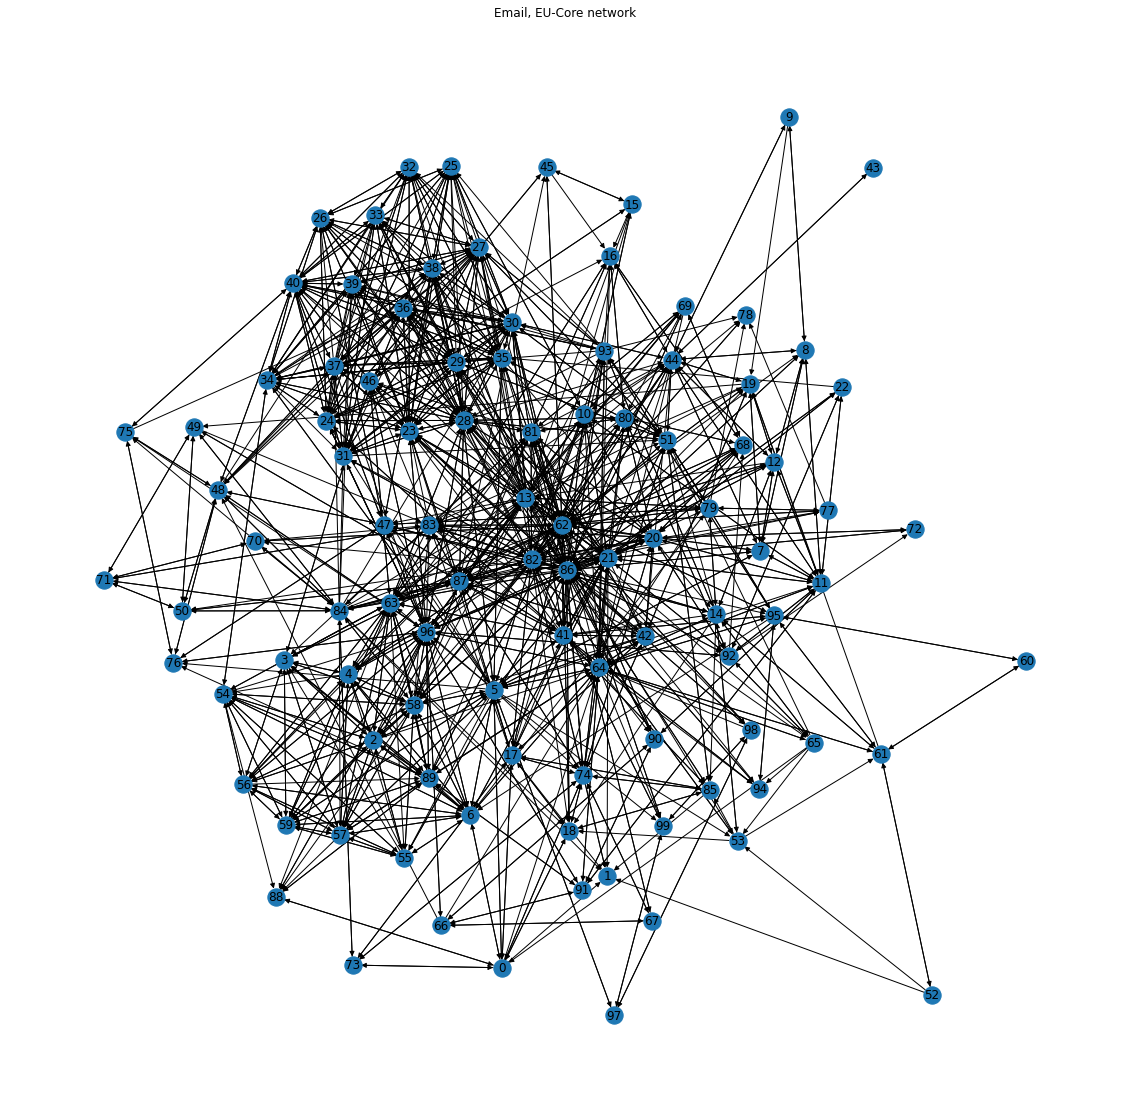

In [4]:
# We are using directed graph as we are interested in emails being sent and received.
G = nx.from_pandas_edgelist(
    df, source="Source", target="Target", create_using=nx.DiGraph()
)
plt.subplots(figsize=(20, 20))
plt.title("Email, EU-Core network")
nx.draw_kamada_kawai(G, with_labels=True)

In [7]:
# The person with the maximum number of interactions is:
student_sent_emails = list(df.groupby("Source")["Target"].count())
np.argmax(student_sent_emails) + 1

86

# Degree centrality

The number of connections between nodes is called degree. In ascending order, the top 10 people with maximum number of connections are:

In [9]:
degree_centrality = nx.algorithms.centrality.degree_centrality(G)
for i, w in enumerate(
    sorted(degree_centrality, key=degree_centrality.get, reverse=True)
):
    if i < 10:
        print(w, degree_centrality[w])
    else:
        break

86 0.8282828282828284
62 0.7676767676767677
82 0.6464646464646465
96 0.6161616161616162
28 0.6060606060606061
21 0.5555555555555556
13 0.5353535353535354
23 0.5151515151515152
30 0.494949494949495
64 0.494949494949495


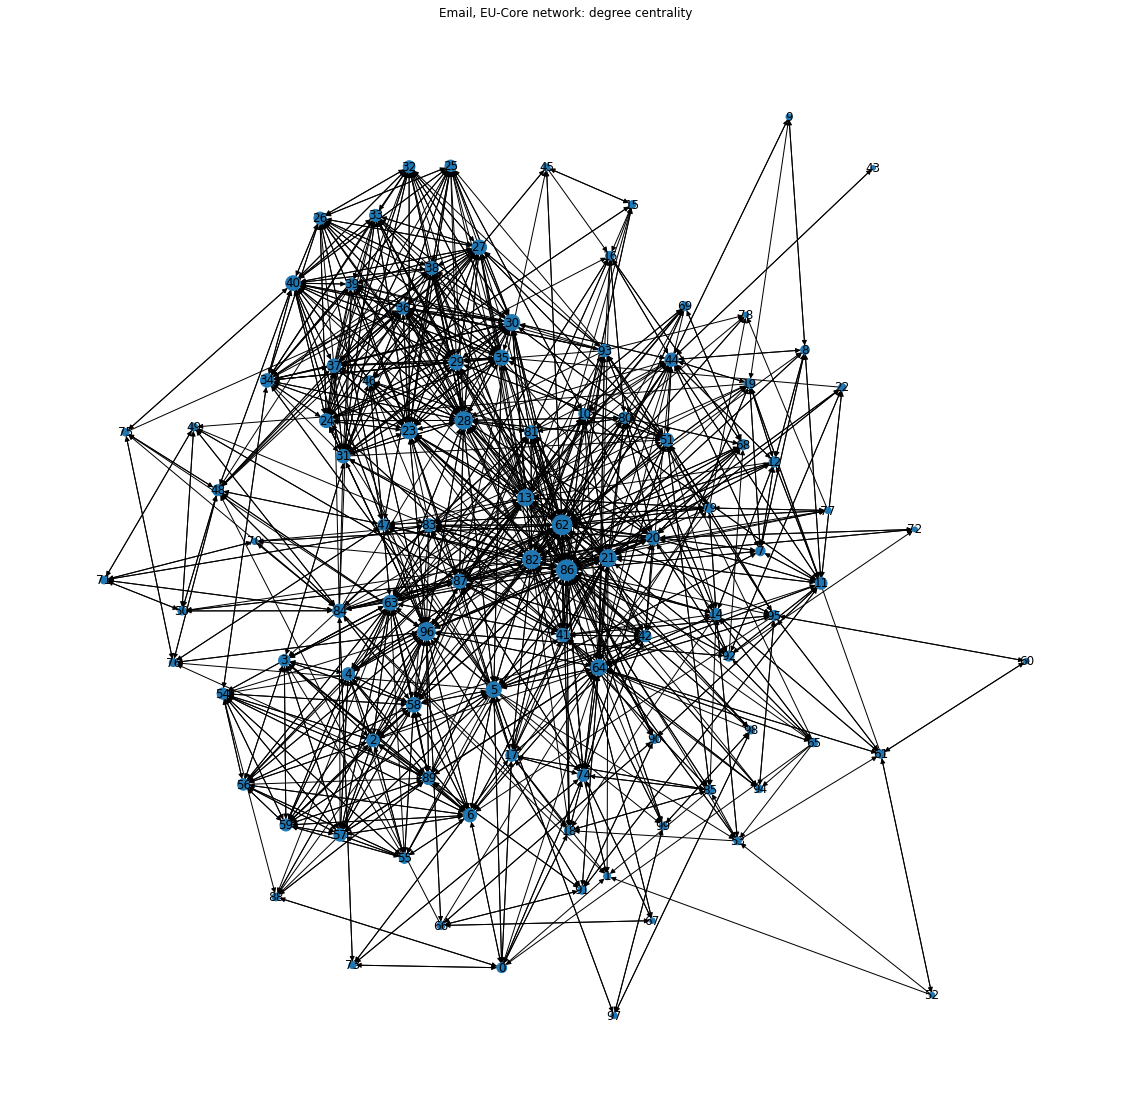

In [16]:
# This network can be visualized with node size proportional to the importance according to degree centrality.

plt.subplots(figsize=(20, 20))
plt.title("Email, EU-Core network: degree centrality")
nx.draw_kamada_kawai(
    G,
    with_labels=True,
    node_size=list(np.array(list(degree_centrality.values())) * 500),
)

## Betweenness Centrality


In [17]:
btw_centrality = nx.algorithms.centrality.betweenness_centrality(G)
for i, w in enumerate(
    sorted(btw_centrality.items(), key=lambda item: item[1], reverse=True)
):
    if i < 10:
        print(w)
    else:
        break

(86, 0.14149427475629858)
(62, 0.12154539177634052)
(96, 0.08160276331043798)
(82, 0.0670387255089669)
(64, 0.06502342115189583)
(21, 0.05061277358840613)
(13, 0.04673865990243992)
(44, 0.04327552467861193)
(5, 0.0412363399245883)
(28, 0.03679924185307917)


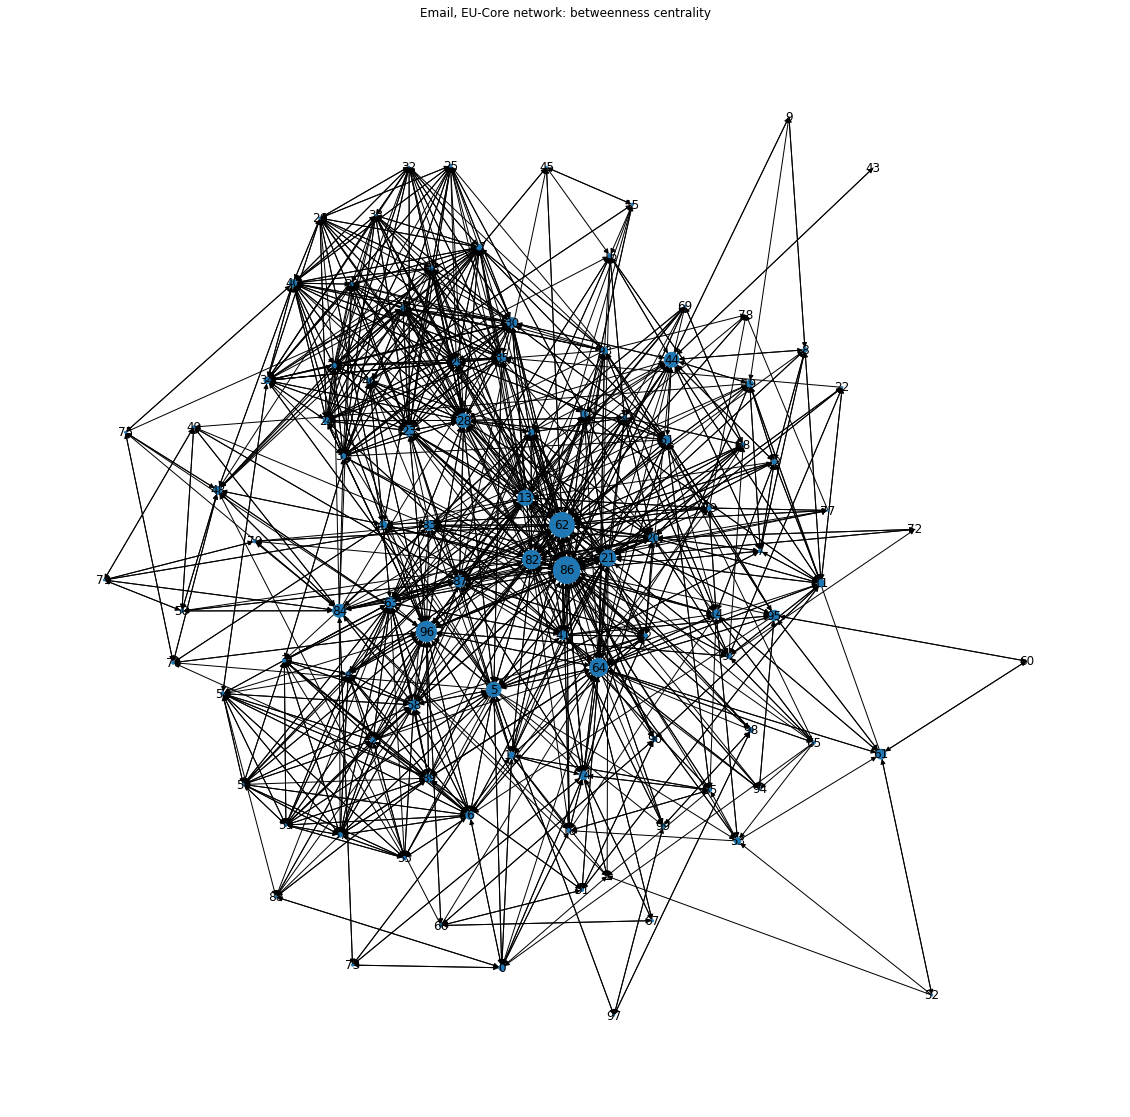

In [18]:
plt.subplots(figsize=(20, 20))
plt.title("Email, EU-Core network: betweenness centrality")
nx.draw_kamada_kawai(
    G, with_labels=True, node_size=list(np.array(list(btw_centrality.values())) * 5000)
)

## Page Rank (Eigenvector centrality)

Another way to identify the important people in the network is to not only look at the number of people who are connected to the person, but also the importance of the people whom they are connected to.

The importance of the person can be defined as proportional to the sum of importance of the immediate people connected to them.

Below is the top ten people who are important based on who they know and whom they are connected to:

In [20]:
ev_centrality = nx.algorithms.centrality.eigenvector_centrality(G)
for i, w in enumerate(
    sorted(ev_centrality.items(), key=lambda item: item[1], reverse=True)
):
    if i > 10:
        break
    print(w)

(28, 0.25779806388704485)
(23, 0.2412215124270137)
(30, 0.21579251773540695)
(62, 0.2061936996975851)
(29, 0.1962488726486241)
(35, 0.19522994610327346)
(86, 0.18934292971595598)
(27, 0.1823911579409791)
(96, 0.18188010730196982)
(40, 0.1803640484660976)
(31, 0.18012770876217743)


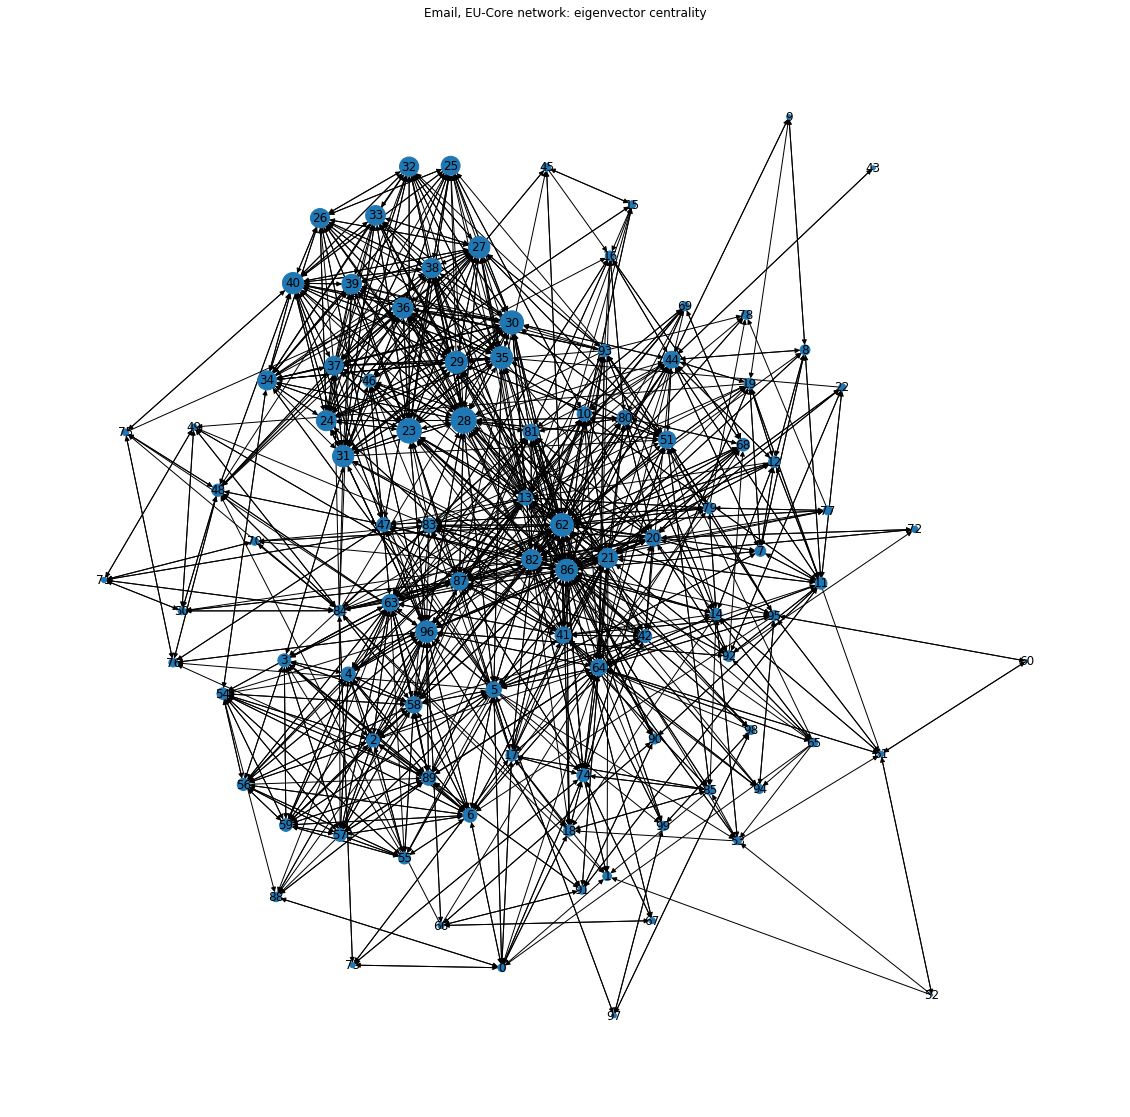

In [21]:
plt.subplots(figsize=(20, 20))
plt.title("Email, EU-Core network: eigenvector centrality")
nx.draw_kamada_kawai(
    G, with_labels=True, node_size=list(np.array(list(ev_centrality.values())) * 2500)
)

## Clustering Coefficient

The clustering coefficient is a way of measuring the degree to which the nodes in a graph cluster together. Networks with high number of clustering coefficient are more social. 

(must the graph be undirected?)

In [23]:
G_undir = nx.from_pandas_edgelist(df, source="Source", target="Target")
nx.algorithms.cluster.average_clustering(G_undir)

0.5130839320504162

## Summary

From the above analysis, we can find the most important people in the network:
- the people who have the most connections (degree centrality)
- te people who are part of multiple groups and are important to send message across the network (betweenness centrality)
- the people who are important based on whom they know immediately (page rank, eigenvector centrality)